# 4. Dimensionality Reduction, Feature Extraction, Manifold Learning (차원 축소, 특성 추출, 매니폴드 학습)
- 비지도 학습을 사용해 데이터를 변환하는 이유 중 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서
- 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘
- 1) 주성분 분석(PCA, Principal Component Analysis)
- 2) 비음수 행렬 분해(NMF, Non-negative Matrix Factorization)는 주로 특성 추출에 널리 사용
- 3) t-SNE(t-distributed Stochastic Neighbor Embedding)알고리즘은 2차원 산점도를 이용해 시각화 용도로 많이 사용

## 4-1. 주성분 분석 (PCA)
- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됨

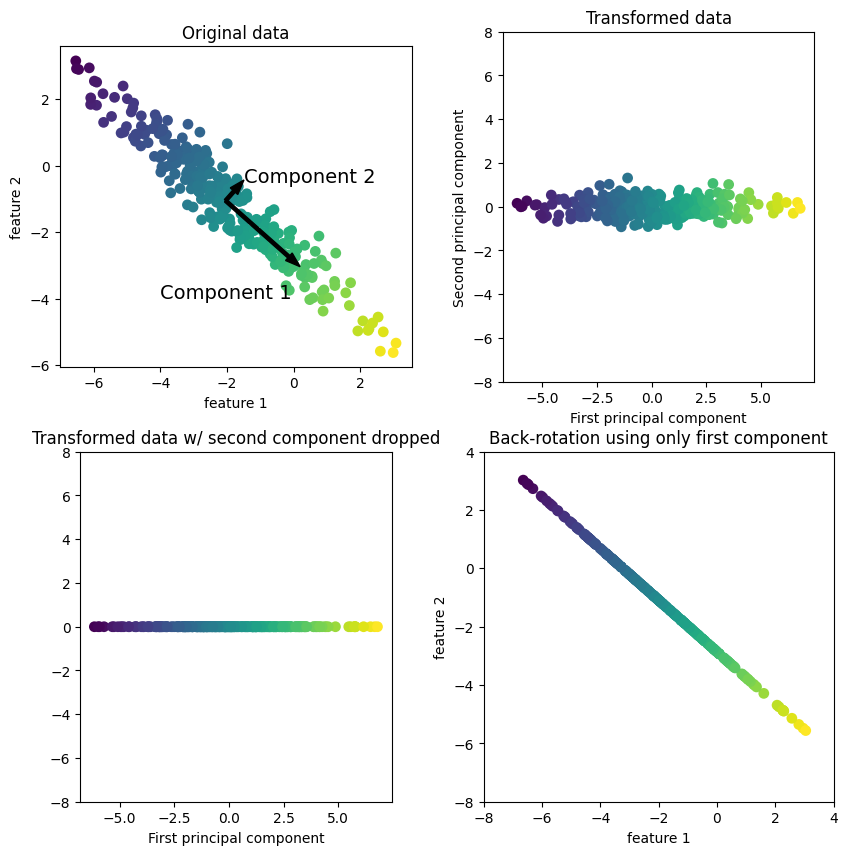

In [7]:
# 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타냄
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

mglearn.plots.plot_pca_illustration()

- 왼쪽 위 그래프는 원본 데이터 포인트를 색으로 구분해 표시
- 이 알고리즘은 먼저 "Component 1"이라고 쓰여 있는, 분산이 가장 큰 방향을 찾음
- 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향
- 다른 말로, 특성들의 상관관계가 가장 큰 방향
- 그 다음으로, 이 알고리즘은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾음
- 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있음
- 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없음
- 즉 화살표를 중앙에서 오른쪽 아래로 향하게 그리지 않고 외쪽 위로 향하게 그릴 수도 있음
- 주성분 (Principal Component) : 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향. 일반적으로 원본 특성 갯수만큼의 주성분이 있음

- 오른쪽 위 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것
- 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄음
- PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬(Correlation Matrix)이 대각선 방향을 제외하고는 0이 됨

- PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있음
- 왼쪽 아래 그래프는 첫 번째 주성분만 유지. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소
- 단순히 원본 특성 중 하나만 남기는 것이 아닌, 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것 (첫 번째 그래프에서 오른쪽 아래로 향하는 성분이 여기 해당)

- 오른쪽 아래 그래프는 데이터에 다시 평균을 더하고 반대로 회전시킨 것
- 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있음
- 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 종종 사용

### PCA를 적용해 유방암 데이터셋 시각화
- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
- 세 개 이상의 특성을 가진 데이터를 산점도로 표현하기란 쉽지 않음
- iris 데이터셋의 경우 두 개씩 짝지은 특성들의 관계를 산점도 행렬로 그릴 수 있었음
- 하지만 cancer 데이터셋에는 산점도 행렬도 적용이 어려움
- 이 데이터셋은 특성이 30개나 되기 때문에(산점도 행렬의 우삼각형 부분만 하더라도) 30 * 14.5 = 435개의 산점도를 그려야 함
- 따라서 이렇게 많은 그래프는 이해나 자세히 들여다보는 것도 어려움
- 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것

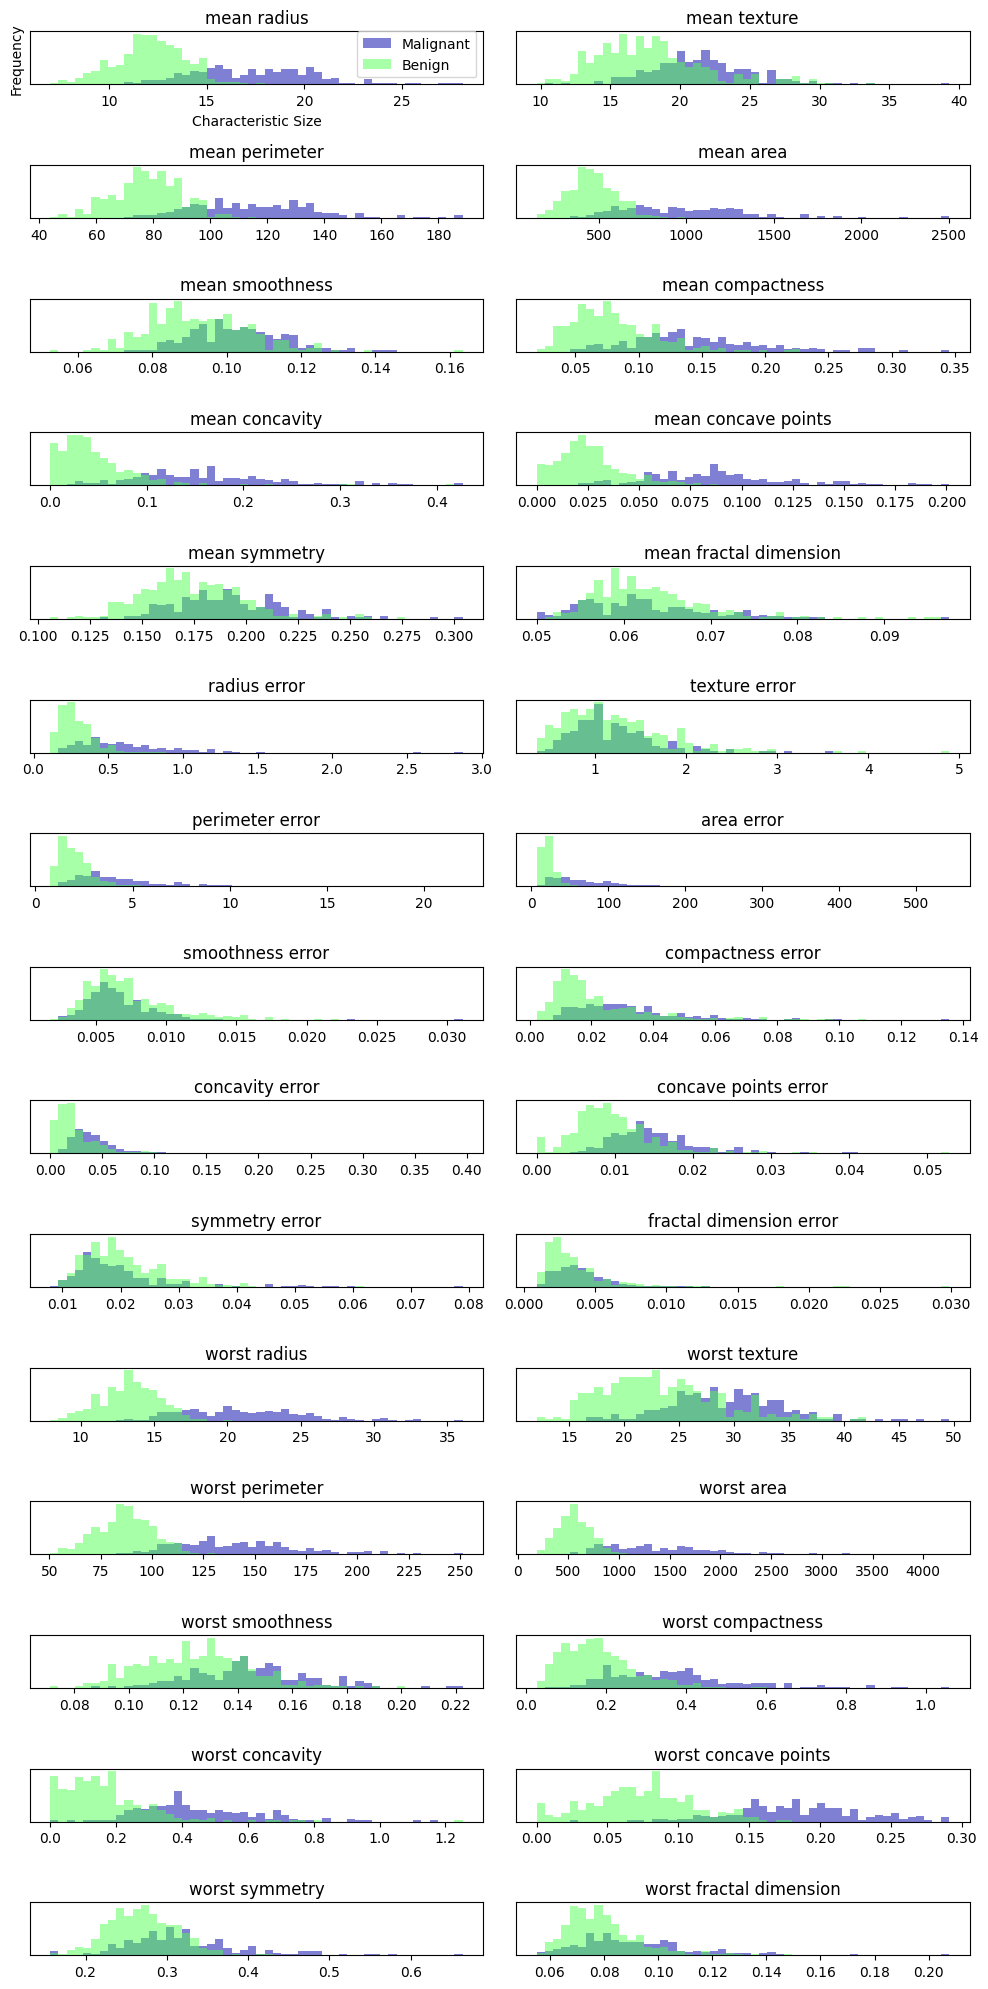

In [11]:
# cancer 데이터의 클래스별 특성 히스토그램

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Characteristic Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc="best")
fig.tight_layout()

- 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것
- 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 푸른색은 악성 클래스의 포인트를 나타냄
- 이 그림은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해볼 수 있음
- 예를 들어 'smoothness error' 특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없음
- 하지만 'worst concave points'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성
- 그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못함
- PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있음

In [13]:
# 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화
# PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- PCA 변환을 학습하고 적용하는 것은 데이터 전처리만큼 간단
- PCA 객체를 생성하고, fit 메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소
- 기본값일 때 PCA는 데이터를 회전(그리고 이동)만 시키고 모든 주성분을 유지
- 데이터의 차원을 줄이려면 PCA 객체를 만들 때 얼마나 많은 성분을 유지할지 알려줘야 함

In [14]:
from sklearn.decomposition import PCA
# 데어의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듦
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


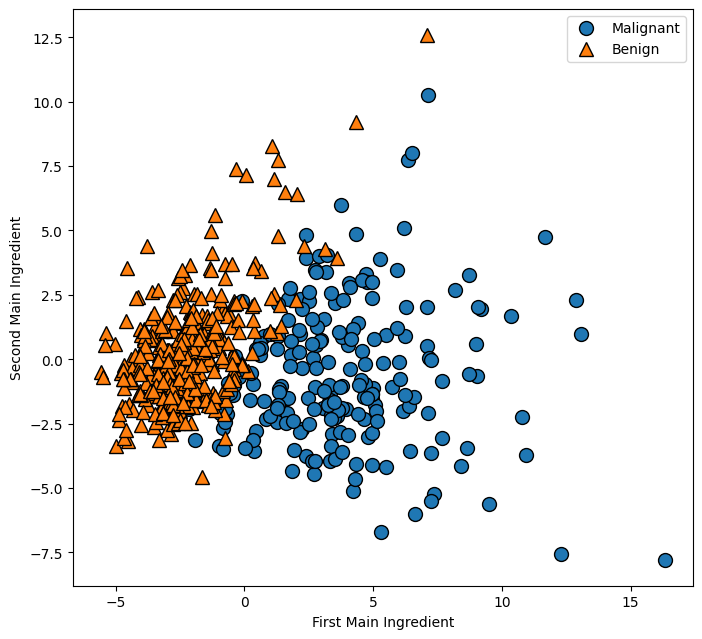

In [16]:
# 처음 두 개의 주성분을 사용해 유방암 데이터셋의 2차원 산점도를 그림
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["Malignant", "Benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Main Ingredient")
plt.ylabel("Second Main Ingredient");

- PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않고, 단순히 데이터에 있는 상관관계 만을 고려
- 이 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었고 클래스 정보를 이용하여 포인트의 모양을 구분
- 두 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있음
- 이런 그림이라면 (2차원 공간에서 직선 하나를 학습하는) 선형 분류기로도 두 클래스를 잘 구분할 수 있을 것
- 또한 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 볼 수 있음
- PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태로, 이런 조합이 보통 매우 복잡
- PCA 객체가 학습될 때 components_ 속성에 주성분이 저장됨

In [17]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


- componenets_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있음
- 맨 처음 주성분이 가장 위에 나타남
- 열은 원본 데이터의 특성에 대응하는 값
- 이 예에서는 "mean radius", "mean texture" 등 임

In [18]:
# componenets_값 출력
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


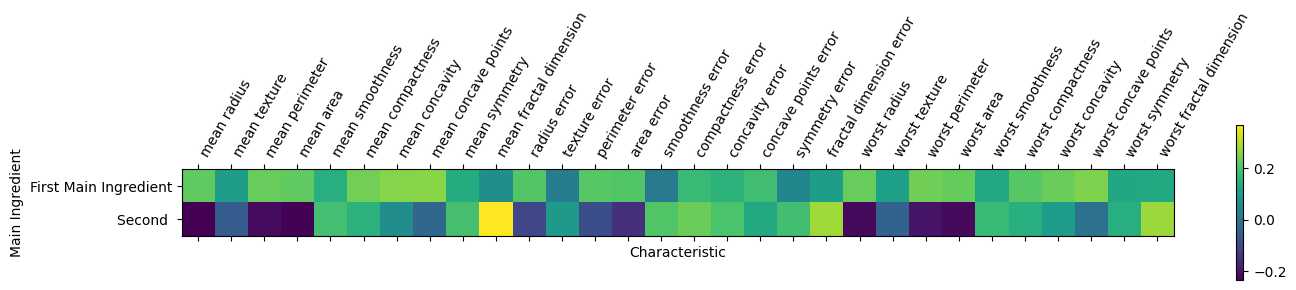

In [21]:
# 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵 (시각화로 이해가 더 쉬움)
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["First Main Ingredient", "Second "])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.xlabel("Characteristic")
plt.ylabel("Main Ingredient");

- 첫 번째 주성분의 모든 특성은 부호가 같음(모두 양수지만, 앞서 언급한 대로 주성분의 화살표 방향은 의미가 없음)
- 모든 특성 사이에 공통의 상호관계가 있다는 뜻
- 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것
- 두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있음

### 고유얼굴 (eigenface) 특성 추출
- 